# OCR방식

In [1]:
import matplotlib.pyplot as plt
import keras_ocr
import os
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


### 영문 OCR

In [2]:
# 테스트 사용 이미지 url 5개 (English ver)

image_urls = [
    'https://images.unsplash.com/photo-1543643723-19cc65407699?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8M3x8dGV4dHxlbnwwfHwwfHw%3D&w=1000&q=80',
    'https://images.unsplash.com/photo-1516062423079-7ca13cdc7f5a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1183&q=80',
    'https://images.unsplash.com/photo-1580428354768-03a028646bc8?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=687&q=80',
    'https://images.unsplash.com/photo-1528716321680-815a8cdb8cbe?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=776&q=80',
    'https://images.unsplash.com/photo-1570302039116-4ecd5822cfe8?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80'
    
    
]
image = [keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


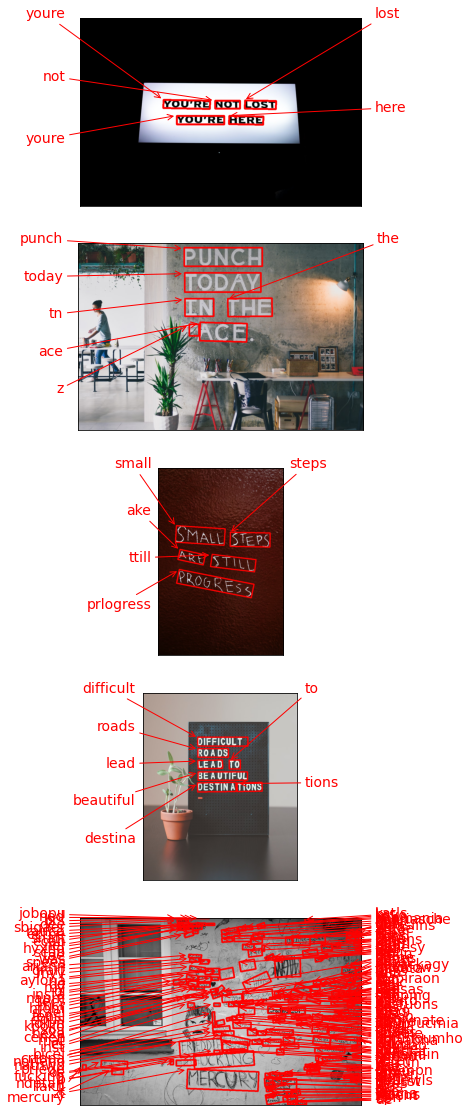

In [3]:
# 시각화
fig, axs = plt.subplots(nrows=len(image), figsize=(20,20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=image[idx], predictions=prediction_groups[idx][0], ax=ax)

### 한국어 OCR

In [4]:
# 테스트 사용 이미지 url 5개 (Korean ver)

image_urls = [
    'https://images.unsplash.com/photo-1619963320071-a08e487577fc?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=776&q=80',
    'https://images.unsplash.com/photo-1629449403075-1d742a38e0e1?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=686&q=80',
    'https://images.unsplash.com/photo-1587278795088-6e6835e571ce?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=629&q=80',
    'https://images.unsplash.com/photo-1617065924939-2b3f4417ca52?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=715&q=80',
    'https://images.unsplash.com/photo-1607623198457-7aad066a4ade?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=715&q=80'
    ]
image = [keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

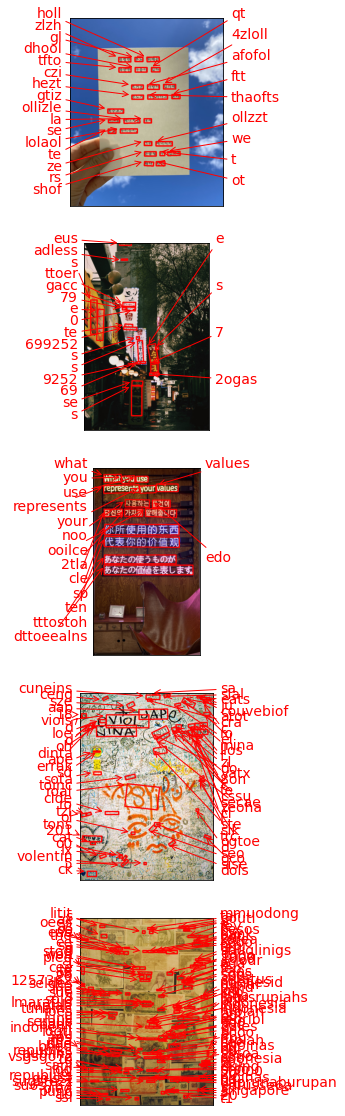

In [5]:
# 시각화
fig, axs = plt.subplots(nrows=len(image), figsize=(20,20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=image[idx], predictions=prediction_groups[idx][0], ax=ax)

- detect는 언어라고 생각되면 다 했지만, 한국어 혹은 다른 언어들은 recognize 하지 못했다.

# 태서렉트

## 영어 문자 검출 및 이미지 crop (detection)

In [6]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.jpg', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str('test'+f'{index}').zfill(2)}.jpg")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/images'
img_file_path = work_dir + '/eng1.jpg'#테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 


cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/images/test0.jpg
/aiffel/aiffel/ocr_python/images/test1.jpg
/aiffel/aiffel/ocr_python/images/test2.jpg
/aiffel/aiffel/ocr_python/images/test3.jpg
/aiffel/aiffel/ocr_python/images/test4.jpg
/aiffel/aiffel/ocr_python/images/test5.jpg
/aiffel/aiffel/ocr_python/images/test6.jpg
/aiffel/aiffel/ocr_python/images/test7.jpg
/aiffel/aiffel/ocr_python/images/test8.jpg
/aiffel/aiffel/ocr_python/images/test9.jpg
/aiffel/aiffel/ocr_python/images/test10.jpg
/aiffel/aiffel/ocr_python/images/test11.jpg
/aiffel/aiffel/ocr_python/images/test12.jpg
/aiffel/aiffel/ocr_python/images/test13.jpg


In [7]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

print('================eng1===============')
recognize_images(cropped_image_path_list)

================eng1===============

% i i ii : | : |


=

|-

a-haM |

Del

=


|


Fr

me

lise

Done


# 태서렉트

## 한국 문자 검출 및 이미지 crop (detection)

In [8]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.jpg', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str('kor_test'+f'{index}').zfill(2)}.jpg")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/images'
img_file_path = work_dir + '/kor1.jpg'#테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/images/kor_test0.jpg
/aiffel/aiffel/ocr_python/images/kor_test1.jpg
/aiffel/aiffel/ocr_python/images/kor_test2.jpg
/aiffel/aiffel/ocr_python/images/kor_test3.jpg
/aiffel/aiffel/ocr_python/images/kor_test4.jpg
/aiffel/aiffel/ocr_python/images/kor_test5.jpg
/aiffel/aiffel/ocr_python/images/kor_test6.jpg
/aiffel/aiffel/ocr_python/images/kor_test7.jpg
/aiffel/aiffel/ocr_python/images/kor_test8.jpg
/aiffel/aiffel/ocr_python/images/kor_test9.jpg
/aiffel/aiffel/ocr_python/images/kor_test10.jpg
/aiffel/aiffel/ocr_python/images/kor_test11.jpg
/aiffel/aiffel/ocr_python/images/kor_test12.jpg
/aiffel/aiffel/ocr_python/images/kor_test13.jpg
/aiffel/aiffel/ocr_python/images/kor_test14.jpg
/aiffel/aiffel/ocr_python/images/kor_test15.jpg
/aiffel/aiffel/ocr_python/images/kor_test16.jpg
/aiffel/aiffel/ocr_python/images/kor_test17.jpg
/aiffel/aiffel/ocr_python/images/kor_test18.jpg
/aiffel/aiffel/ocr_python/images/kor_test19.jpg


In [9]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

print('================kor1===============')
recognize_images(cropped_image_path_list)

================kor1===============
뜨거운

사

랑이


있기에

부

나 27

「

가

능

하

다 그

본다.

^ 도.

에

너

지

들

내서


Done


### 결과

keras_ocr은 영어만 인식가능하여 한국어는 인식하지 못하였고

tesseract는 영어와 한글 둘 다 인식이 가능하지만 recognize를 잘 하지 못하였다. 정확도도떨어졌다.

신용카드를 쓰지않아 Google OCR API를 실험하지는 못하였지만, 다양한 글자 이미지를 인식하는 모델은 Google OCR인것같다.